In [1]:
from xenonnt_plot_style import XENONPlotStyle as xps
xps.use('xenonnt')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from utils import k0, gamma
from utils import te_amplitude, tm_amplitude
from plot import plot_V

## 1

In [3]:
lam = 1.33

/home/xudc/fundamentals_of_photonics/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  V += np.arctan(nf ** 2 / ns ** 2 * (b / (1 - b)) ** 0.5)
/home/xudc/fundamentals_of_photonics/utils.py:91: RuntimeWarning: divide by zero encountered in divide
  V += np.arctan(nf ** 2 / nc ** 2 * ((b + a) / (1 - b)) ** 0.5)
/home/xudc/fundamentals_of_photonics/utils.py:92: RuntimeWarning: divide by zero encountered in divide
  V /= (1 - b) ** 0.5


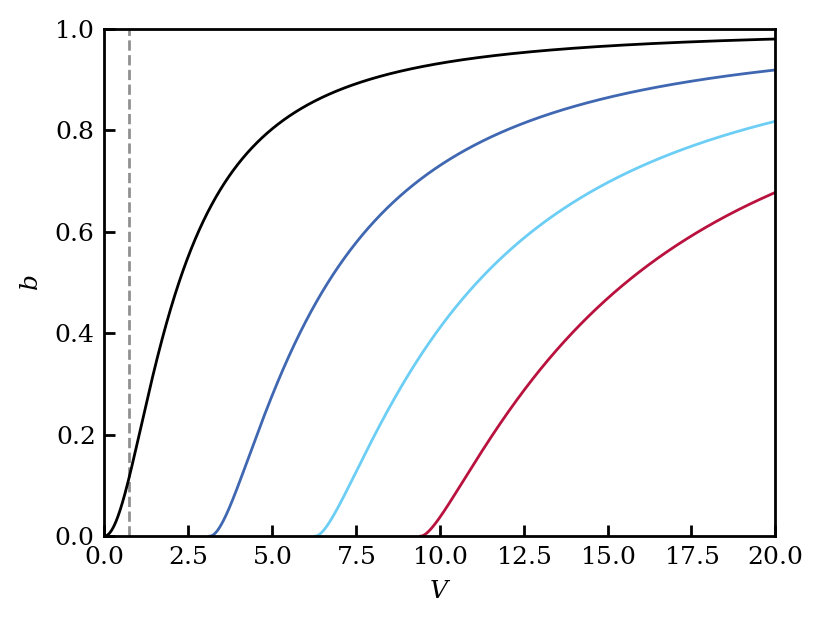

In [4]:
nf = 1.5
ns = 1.498
nc = 1.498
h = 2.0
root = plot_V(lam, nf, ns, nc, h, te=False, numax=3)[0]
neff1 = (root * (nf ** 2 - ns ** 2) + ns ** 2) ** 0.5

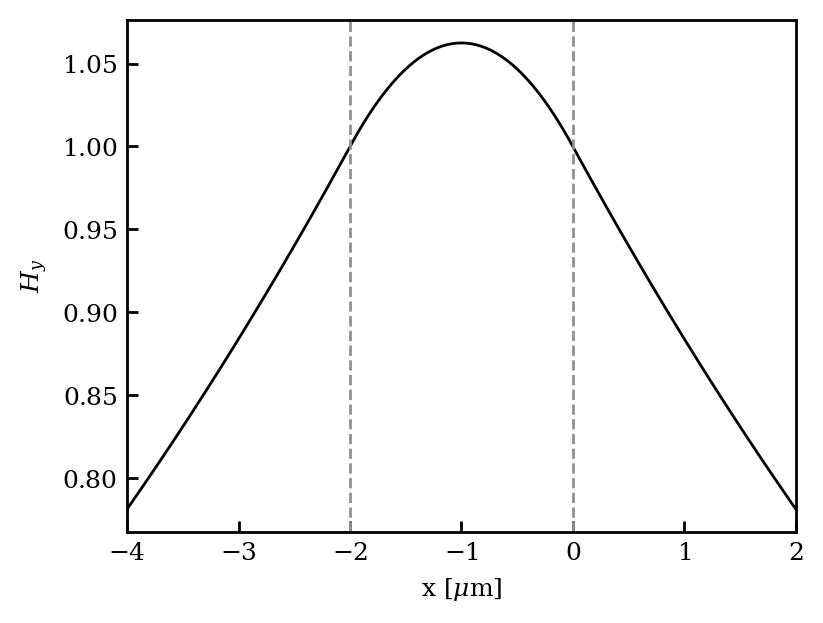

In [5]:
# H_y of first TM mode

x = np.linspace(-2 * h, h, 10001)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

kf = (nf ** 2 - neff1 ** 2) ** 0.5 * k0(lam)
ax.plot(x, tm_amplitude(x, kf, lam, nf, ns, nc, h))
ax.axvline(0, linestyle='dashed', color=xps.colors['grey'])
ax.axvline(-h, linestyle='dashed', color=xps.colors['grey'])

ax.set_xlim(x[0], x[-1])

ax.set_xlabel('x [$\mu$m]')
ax.set_ylabel('$H_y$')

plt.show()

/home/xudc/fundamentals_of_photonics/utils.py:87: RuntimeWarning: divide by zero encountered in divide
  V += np.arctan((b / (1 - b)) ** 0.5)
/home/xudc/fundamentals_of_photonics/utils.py:88: RuntimeWarning: divide by zero encountered in divide
  V += np.arctan(((b + a) / (1 - b)) ** 0.5)


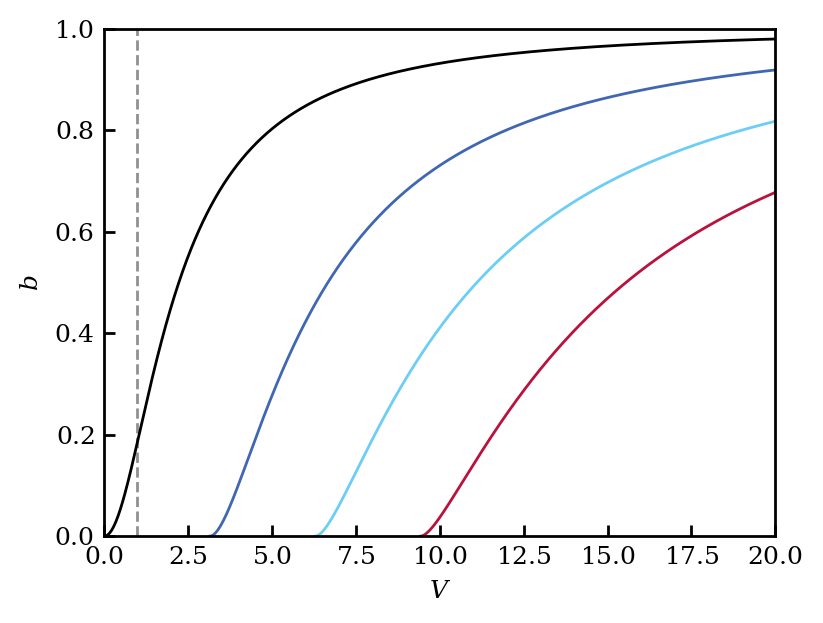

In [6]:
nf = neff1
ns = 1.498
nc = 1.498
h = 8.0
root = plot_V(lam, nf, ns, nc, h, te=True, numax=3)[0]
neff = (root * (nf ** 2 - ns ** 2) + ns ** 2) ** 0.5

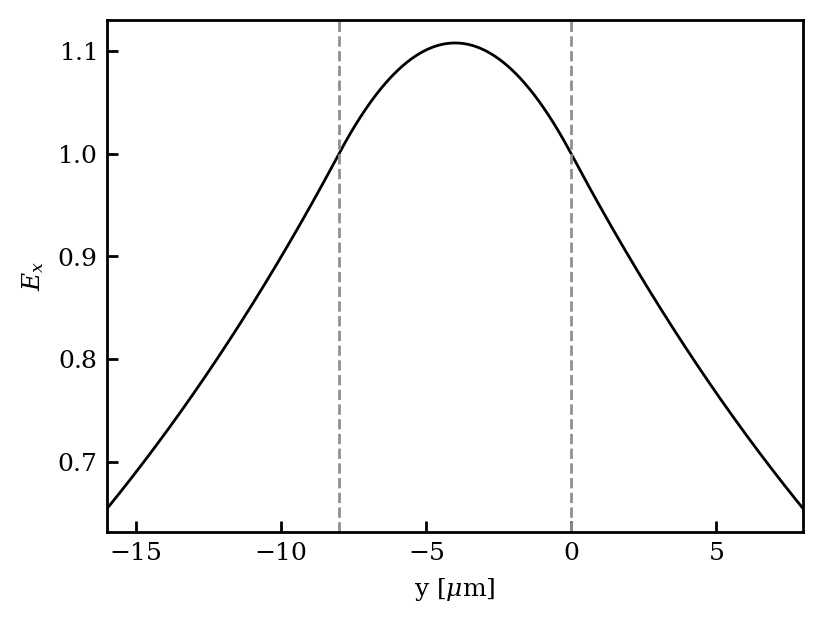

In [7]:
# E_x of first TE mode

y = np.linspace(-2 * h, h, 10001)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

kf = (nf ** 2 - neff ** 2) ** 0.5 * k0(lam)
ax.plot(y, te_amplitude(y, kf, lam, nf, ns, nc, h))
ax.axvline(0, linestyle='dashed', color=xps.colors['grey'])
ax.axvline(-h, linestyle='dashed', color=xps.colors['grey'])

ax.set_xlim(y[0], y[-1])

ax.set_xlabel('y [$\mu$m]')
ax.set_ylabel('$E_x$')

plt.show()

In [8]:
kf = k0(lam) * (neff1 ** 2 - neff ** 2) ** 0.5
beta = k0(lam) * neff
g = gamma(kf, lam, neff1, ns)

In [9]:
neff1, beta, kf, g

(1.4982270900057442,
 7.077049558892461,
 0.11123204796591306,
 0.05303711173066988)

In [10]:
a = 1.0
b = 4.0

In [11]:
K = (neff1 ** 2 - neff ** 2) / (lam ** 2 * beta)
K *= np.exp(-(2 * a + b) * g) * (g * np.sinh(b * g) + kf * np.cosh(b * g) * np.tan(b * kf))
K /= kf ** 2 + g ** 2
K /= (np.sin(2 * kf * b) / kf + 2 * b) / (np.cos(2 * kf * b) + 1) + 1 / g

In [12]:
K * 1e4  # in cm^-1

0.04958905437477698

In [13]:
np.pi / (2 * K * 1e4)

31.676271036010473

## 2

In [14]:
lam = 2 * np.pi / 1

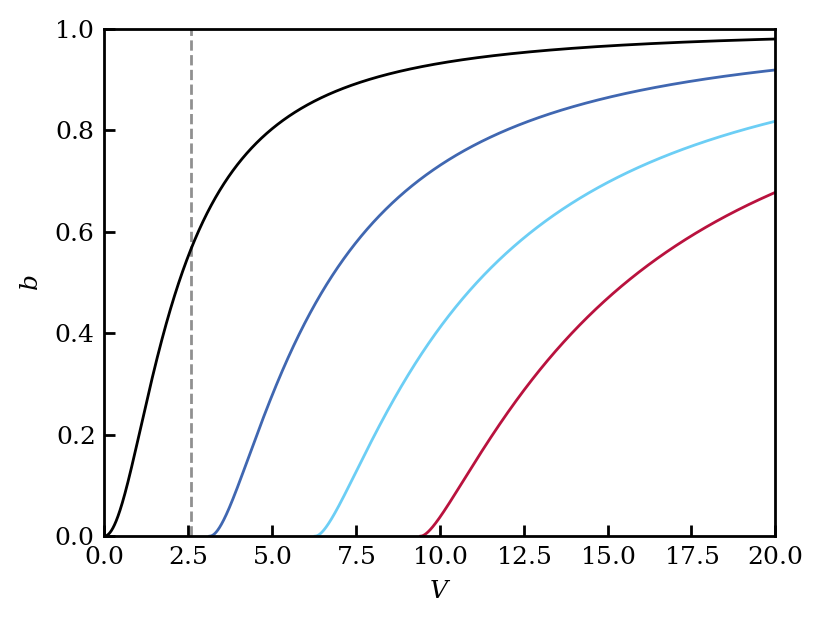

In [15]:
nf = 3.0
ns = 1.5
nc = 1.5
h = 1.0
root = plot_V(lam, nf, ns, nc, h, te=True, numax=3)[0]
neff1 = (root * (nf ** 2 - ns ** 2) + ns ** 2) ** 0.5

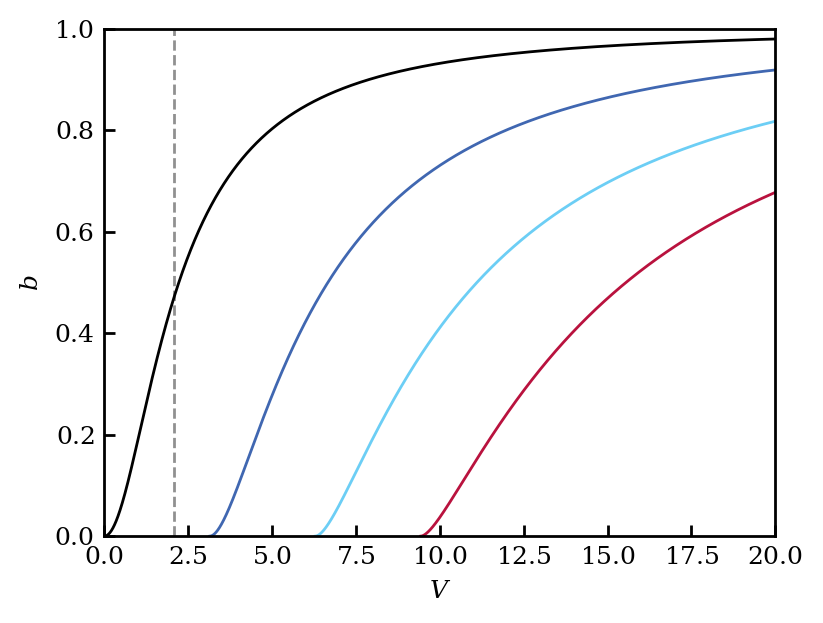

In [16]:
nf = 3.0
ns = 1.5
nc = 1.5
h = 0.8
root = plot_V(lam, nf, ns, nc, h, te=True, numax=3)[0]
neff2 = (root * (nf ** 2 - ns ** 2) + ns ** 2) ** 0.5

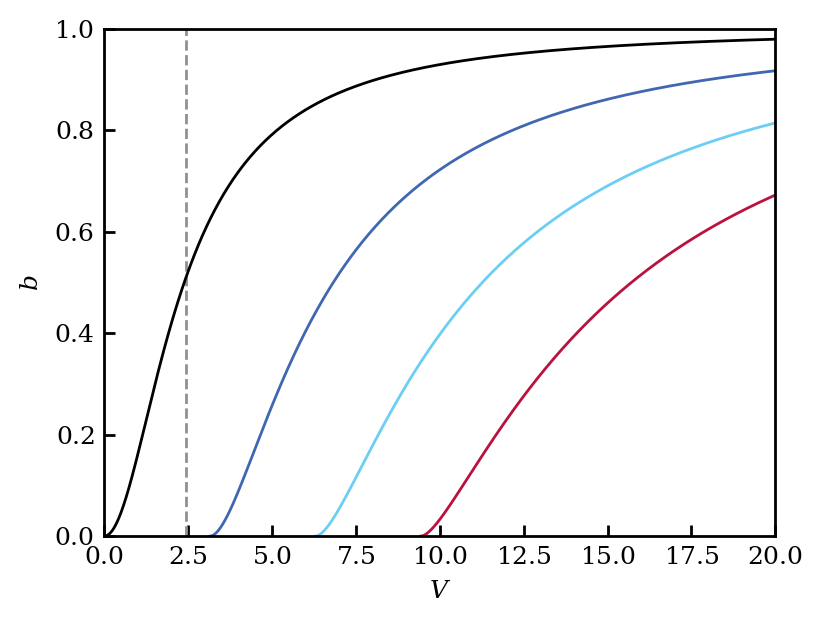

In [17]:
nf = neff1
ns = neff2
nc = neff2
h = 3.0
root = plot_V(lam, nf, ns, nc, h, te=False, numax=3)[0]
neff = (root * (nf ** 2 - ns ** 2) + ns ** 2) ** 0.5

In [18]:
neff

2.400452946569127